In [1]:
import sys
sys.path.append("/home/adityas/UGA/SensorWeb/scripts/Summer2018/code")

from pathlib import Path
import pandas
import seaborn
import matplotlib.pyplot as plotter
import numpy
from scipy.signal import *

Import data loaders and all

In [2]:
from model.data_loader import DataLoader

In [3]:
files = list(Path("../data/high_sense/").iterdir())
files = sorted(files, key=lambda x: int(str(x).split("/")[-1].split(".")[0].split("_")[-1]))
files[:10]

[PosixPath('../data/high_sense/run_0.csv'),
 PosixPath('../data/high_sense/run_1.csv'),
 PosixPath('../data/high_sense/run_2.csv'),
 PosixPath('../data/high_sense/run_3.csv'),
 PosixPath('../data/high_sense/run_4.csv'),
 PosixPath('../data/high_sense/run_5.csv'),
 PosixPath('../data/high_sense/run_6.csv'),
 PosixPath('../data/high_sense/run_7.csv'),
 PosixPath('../data/high_sense/run_8.csv'),
 PosixPath('../data/high_sense/run_9.csv')]

Initialize data loader

## Data stats

In [4]:
dataloader = DataLoader(files)

Print some statistics to look at distributions

        cpu      disk   network    energy
0  0.636356  0.109643  0.032550  0.204011
1  0.878655  0.000000  0.002232  0.228408
2  1.000000  0.054926  0.065164  0.288503
3  0.890368  0.000000  0.067236  0.247839
4  0.879670  0.000000  0.056766  0.242525


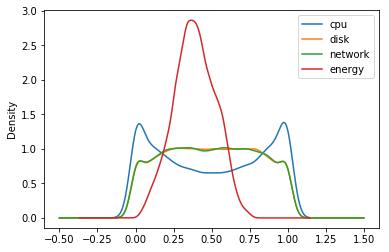

In [5]:
test_data = dataloader[0]
print(test_data.head(5))
test_data.plot(kind="density")
plotter.legend()
plotter.show()

Have a peek at the target function

In [6]:
!head ../scripts/exp.log -n 15

DEBUG:CPU:CPU component initialized
DEBUG:DiskIO:Disk IO component initialized
DEBUG:Network:Networking component initialized
DEBUG:CPU:CPU component initialized
DEBUG:DiskIO:Disk IO component initialized
DEBUG:Network:Networking component initialized
DEBUG:CPU:CPU component initialized
DEBUG:DiskIO:Disk IO component initialized
DEBUG:Network:Networking component initialized
INFO:HighSensitivityLinearEM:Energy meter init with factors cpu:0.24792518649303633 + disk:0.2550646624326527 + net:0.2542521020480565
INFO:Device:Device initialised
DEBUG:Device:Device in state compute
DEBUG:Device:Device in state net_send
DEBUG:Device:Device in state read
DEBUG:Device:Device in state compute


Take a look at the waveforms

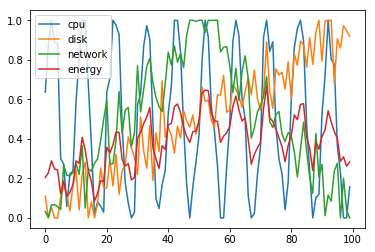

In [7]:
test_data[:100].plot()
plotter.legend()
plotter.show()

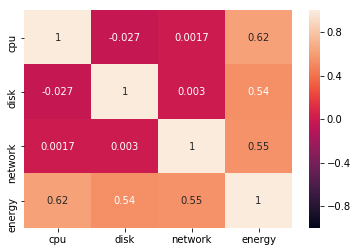

In [8]:
corr = test_data.corr()
seaborn.heatmap(corr, annot=True, vmin=-1.0)
plotter.show()

Clean up

In [9]:
del test_data

## Learn function

In [10]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error

In [11]:
regressor = SGDRegressor()

In [12]:
for i in range(1):
    for batch in range(len(dataloader)):
        data = dataloader[i]
        y = data["energy"]
        X = data.drop("energy", axis=1)
        
        regressor.partial_fit(X, y)
        
        print(f"For epoch {i} batch {batch} score is {mean_absolute_error(y_pred=regressor.predict(X), y_true=y)}")

print(f"Regression coefficients are {regressor.coef_}")
print(f"Bias {regressor.intercept_}")

/home/adityas/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


For epoch 0 batch 0 score is 0.011860475267200897
For epoch 0 batch 1 score is 0.004080754379115888
For epoch 0 batch 2 score is 0.0016489739672166655
For epoch 0 batch 3 score is 0.000753998143606441
For epoch 0 batch 4 score is 0.0003962363945902726
For epoch 0 batch 5 score is 0.0002429276647368222
For epoch 0 batch 6 score is 0.0001758326282765391
For epoch 0 batch 7 score is 0.00014397704187458504
For epoch 0 batch 8 score is 0.00012889204574807172
For epoch 0 batch 9 score is 0.00012227017371765764
For epoch 0 batch 10 score is 0.00011813668417457079
For epoch 0 batch 11 score is 0.00011621470326097617
For epoch 0 batch 12 score is 0.00011558187956804445
For epoch 0 batch 13 score is 0.00011510276200376418
For epoch 0 batch 14 score is 0.00011525401176549365
For epoch 0 batch 15 score is 0.00011476608246325174
For epoch 0 batch 16 score is 0.00011470293862195815
For epoch 0 batch 17 score is 0.00011454383512907354
For epoch 0 batch 18 score is 0.00011449515607016286
For epoch 0 b

## Repeat for low sensitivity

In [13]:
files = list(Path("../data/low_sense/").iterdir())
files = sorted(files, key=lambda x: int(str(x).split("/")[-1].split(".")[0].split("_")[-1]))
files[:10]

[PosixPath('../data/low_sense/run_0.csv'),
 PosixPath('../data/low_sense/run_1.csv'),
 PosixPath('../data/low_sense/run_2.csv'),
 PosixPath('../data/low_sense/run_3.csv'),
 PosixPath('../data/low_sense/run_4.csv'),
 PosixPath('../data/low_sense/run_5.csv'),
 PosixPath('../data/low_sense/run_6.csv'),
 PosixPath('../data/low_sense/run_7.csv'),
 PosixPath('../data/low_sense/run_8.csv'),
 PosixPath('../data/low_sense/run_9.csv')]

Initialize data loader

## Data stats

In [14]:
dataloader = DataLoader(files)

Print some statistics to look at distributions

        cpu      disk   network    energy
0  0.384791  0.000000  0.094509  0.546326
1  0.749329  0.000000  0.136154  0.585482
2  0.944901  0.000000  0.000000  0.590831
3  1.000000  0.092799  0.000000  0.605568
4  0.774858  0.000000  0.052748  0.579697


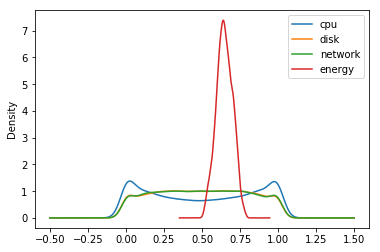

In [15]:
test_data = dataloader[0]
print(test_data.head(5))
test_data.plot(kind="density")
plotter.legend()
plotter.show()

Have a peek at the target function

In [16]:
!head ../scripts/lowsense.log -n 15

DEBUG:CPU:CPU component initialized
DEBUG:DiskIO:Disk IO component initialized
DEBUG:Network:Networking component initialized
DEBUG:CPU:CPU component initialized
DEBUG:DiskIO:Disk IO component initialized
DEBUG:Network:Networking component initialized
DEBUG:CPU:CPU component initialized
DEBUG:DiskIO:Disk IO component initialized
DEBUG:Network:Networking component initialized
INFO:LowSensitivityLinearEM:Energy meter init with factorscpu:0.09612754537369309 + disk:0.10173242858102917 +net:0.0987955747978398
INFO:Device:Device initialised
DEBUG:Device:Device in state compute
DEBUG:Device:Device in state net_send
DEBUG:Device:Device in state read
DEBUG:Device:Device in state compute


Take a look at the waveforms

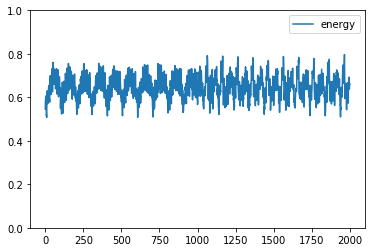

In [17]:
test_data["energy"][:2000].plot()
plotter.legend()
plotter.ylim(0,1)
plotter.show()

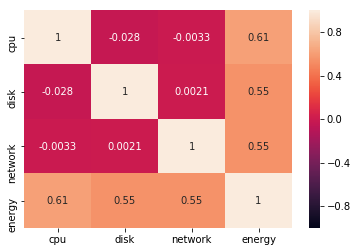

In [18]:
corr = test_data.corr()
seaborn.heatmap(corr, annot=True, vmin=-1.0)
plotter.show()

Clean up

In [19]:
del test_data

## Learn function

In [20]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error

In [21]:
regressor = SGDRegressor()

In [22]:
for i in range(1):
    for batch in range(len(dataloader)):
        data = dataloader[i]
        y = data["energy"]
        X = data.drop("energy", axis=1)
        
        regressor.partial_fit(X, y)
        
        print(f"For epoch {i} batch {batch} score is {mean_absolute_error(y_pred=regressor.predict(X), y_true=y)}")

print(f"Regression coefficients are {regressor.coef_}")
print(f"Bias {regressor.intercept_}")

/home/adityas/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


For epoch 0 batch 0 score is 0.007705214385016956
For epoch 0 batch 1 score is 0.0025759808652564813
For epoch 0 batch 2 score is 0.000969224870717326
For epoch 0 batch 3 score is 0.0003796585841270493
For epoch 0 batch 4 score is 0.00014306810510340972
For epoch 0 batch 5 score is 4.218037195952486e-05
For epoch 0 batch 6 score is 8.934796230085011e-06
For epoch 0 batch 7 score is 2.5556746579219525e-05
For epoch 0 batch 8 score is 3.539618671565319e-05
For epoch 0 batch 9 score is 4.009033670715438e-05
For epoch 0 batch 10 score is 4.255348579403466e-05
For epoch 0 batch 11 score is 4.342402385248358e-05
For epoch 0 batch 12 score is 4.4172776619940784e-05
For epoch 0 batch 13 score is 4.4772552582360245e-05
For epoch 0 batch 14 score is 4.4750065690941344e-05
For epoch 0 batch 15 score is 4.501472743372038e-05
For epoch 0 batch 16 score is 4.493924457477833e-05
For epoch 0 batch 17 score is 4.5099955957341996e-05
For epoch 0 batch 18 score is 4.505089259273457e-05
For epoch 0 batch 

Try NNF

In [23]:
from sklearn.decomposition import NMF

In [24]:
data = dataloader[0]
y = data["energy"]
X = data.drop("energy", axis=1)

In [25]:
nmf = NMF(n_components=3, max_iter=1000)

In [26]:
#print(y)
#print(y.reshape(-1, 100))
nmf.fit(y.reshape(-1, 100).T)

/home/adityas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=1000,
  n_components=3, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [27]:
nmf.reconstruction_err_

2.8606531544825637

In [28]:
nmf.components_

array([[5.11208323e-01, 5.12141005e-01, 5.07787726e-01, 5.04989344e-01,
        5.05068884e-01, 5.01862383e-01, 5.03220965e-01, 5.01161852e-01,
        5.04275763e-01, 5.01985372e-01, 6.53778437e-01, 6.47959954e-01,
        6.45114165e-01, 6.45508039e-01, 6.50441174e-01, 6.47791667e-01,
        6.36644785e-01, 6.39540253e-01, 6.40652978e-01, 6.40399160e-01,
        5.34010836e-01, 5.32140501e-01, 5.30593711e-01, 5.32126244e-01,
        5.27315151e-01, 5.33249032e-01, 5.32746051e-01, 5.35190655e-01,
        5.38727344e-01, 5.36738913e-01, 5.09660098e-01, 5.02872725e-01,
        5.07005158e-01, 5.00475272e-01, 5.01956407e-01, 5.03004202e-01,
        5.04387949e-01, 5.04115423e-01, 5.00181267e-01, 4.97603644e-01,
        6.50801325e-01, 6.45683572e-01, 6.46640923e-01, 6.44583737e-01,
        6.44849189e-01, 6.47380424e-01, 6.44561643e-01, 6.42749468e-01,
        6.38602109e-01, 6.39640202e-01, 5.27201054e-01, 5.28502629e-01,
        5.38157688e-01, 5.31660803e-01, 5.31873770e-01, 5.374595

In [29]:
_X = nmf.transform(y.reshape(-1, 100).T)

/home/adityas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [30]:
_X.T

array([[8.40477462e-01, 8.81880993e-01, 9.27653633e-01, 9.78735140e-01,
        1.02823422e+00, 1.04663810e+00, 1.03219653e+00, 1.00412212e+00,
        9.73800797e-01, 9.40986927e-01, 9.51508546e-01, 9.82605372e-01,
        1.02240183e+00, 1.06554787e+00, 1.10857304e+00, 1.11676020e+00,
        1.09366773e+00, 1.05634501e+00, 1.01809614e+00, 9.73887375e-01,
        9.78132285e-01, 1.00256773e+00, 1.03170048e+00, 1.05825135e+00,
        1.09845093e+00, 1.09315166e+00, 1.05524021e+00, 1.00875797e+00,
        9.68614242e-01, 9.17744874e-01, 9.18296139e-01, 9.38224771e-01,
        9.66623722e-01, 8.90453843e-01, 8.68808557e-01, 8.72710166e-01,
        8.44836132e-01, 8.05542546e-01, 7.70575412e-01, 7.39727633e-01,
        7.51859157e-01, 7.83394929e-01, 8.29088503e-01, 8.74221775e-01,
        9.24942374e-01, 9.45298336e-01, 9.32177200e-01, 9.17617598e-01,
        8.85297657e-01, 8.65826515e-01, 8.81702269e-01, 9.37315817e-01,
        9.87067522e-01, 1.03607898e+00, 1.09592581e+00, 1.112196

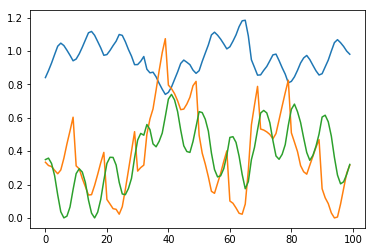

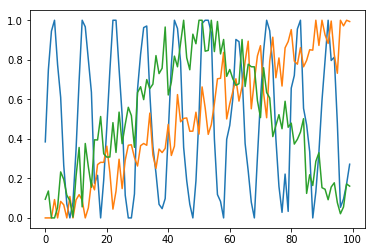

In [31]:
plotter.plot(_X[:100])
plotter.show()
plotter.plot(X[:100])
plotter.show()